In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [165]:
df=pd.read_csv("E:/DataTrained/Projects/Week 2/abalone.csv")

In [166]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [167]:
df.shape

(4177, 9)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As we have to predict the value of Number of Rings through which we can predict its age.
So, lets first compute the Target Variable of the proble AGE and assign it to the dataset.
AGE = RINGS + 1.5

In [169]:
df['Age'] = df['Rings'] + 1.5

In [170]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [171]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,20.5


In [172]:
df.drop('Rings', axis=1, inplace=True)

Here, we are dropping the feature 'Rings' as it is not needed anymore.
Inplace of that, now we have 'Age'.  

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [174]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [175]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


### Visualization of Data

First, here I am trying to see any relationship between the Label(Age) and the Features(Diameter, Length,and Height) 

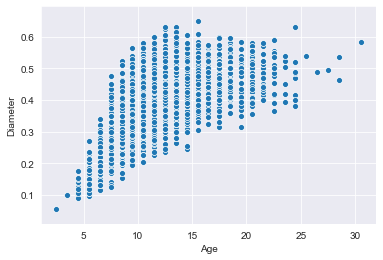

In [176]:
sns.scatterplot(x="Age", y="Diameter", data=df)

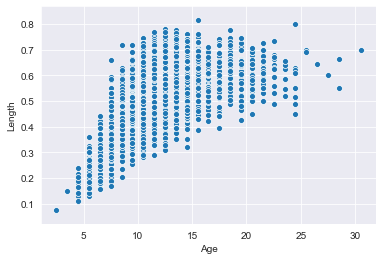

In [177]:
sns.scatterplot(x="Age", y="Length", data=df)

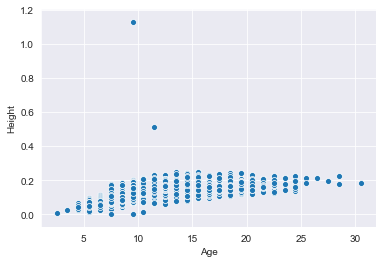

In [178]:
sns.scatterplot(x="Age", y="Height", data=df)

In [179]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


From the "Scatterplot" and "df.corr" we can say that the Age and Length, Diameter, and Height of Abalone has somewhat MODERATE relationship.

As we have noticed that information about the SEX of the Abalone is missing. We have to know that how the Data is actually distributed for this column.

In [180]:
#df_sex = df['Sex'].value_counts()
#print(df_sex.head())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


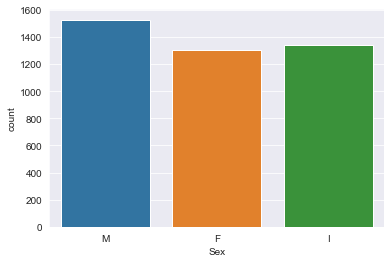

In [181]:
df_sex=sns.countplot(x="Sex", data=df)
print(df["Sex"].value_counts())

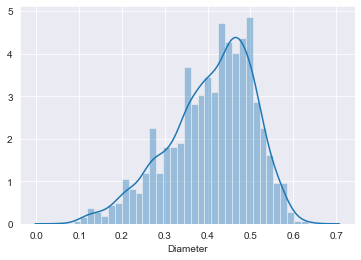

In [182]:
sns.distplot(df["Diameter"])

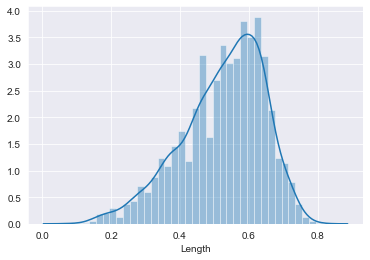

In [183]:
sns.distplot(df["Length"])

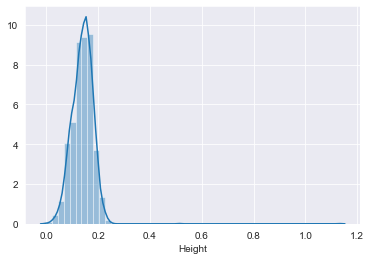

In [184]:
sns.distplot(df["Height"])

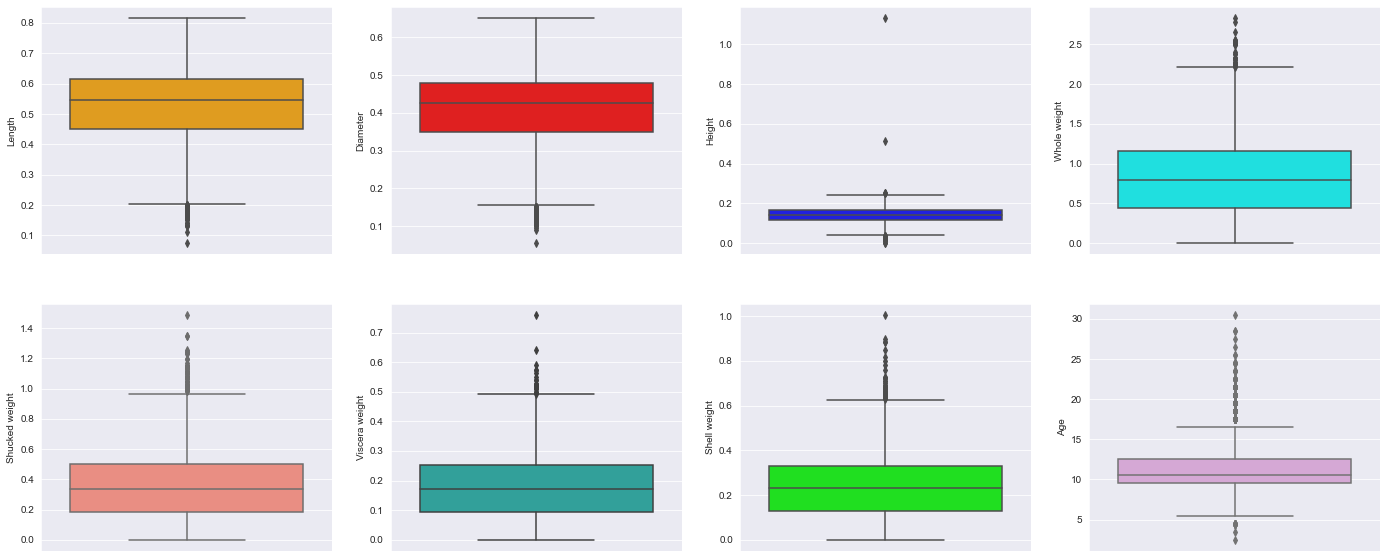

In [185]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'orange')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'blue')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'lightseagreen')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'Age', data = df, color = 'plum')

Now we will use seaborn lmplot to look for outliers and removing them.

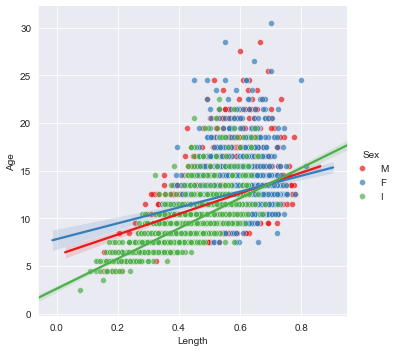

In [186]:
sns.set_style('darkgrid')

sns.lmplot(x = 'Length', y = 'Age', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [187]:
df.drop(df[(df['Length']<0.1) & (df['Age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['Age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['Age']< 25)].index, inplace=True)

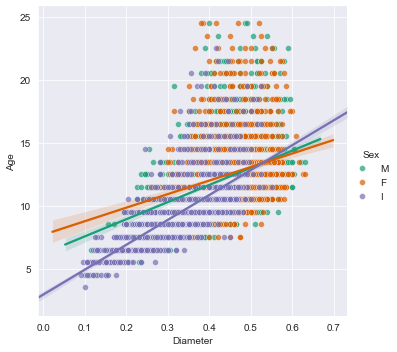

In [188]:
sns.lmplot(x = 'Diameter', y = 'Age', data = df, hue = 'Sex', palette = 'Dark2', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [189]:
df.drop(df[(df['Diameter']<0.1) & (df['Age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['Age']< 25)].index, inplace=True)

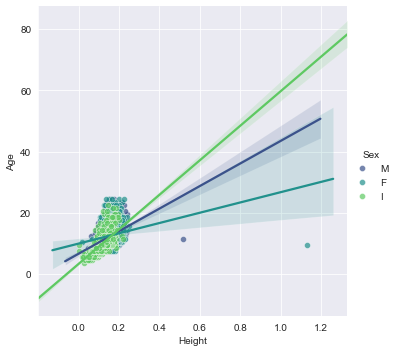

In [190]:
sns.lmplot(x = 'Height', y = 'Age', data = df, hue = 'Sex', palette = 'viridis', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [191]:
df.drop(df[(df['Height']>0.4) & (df['Age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['Age'] > 25)].index, inplace=True)

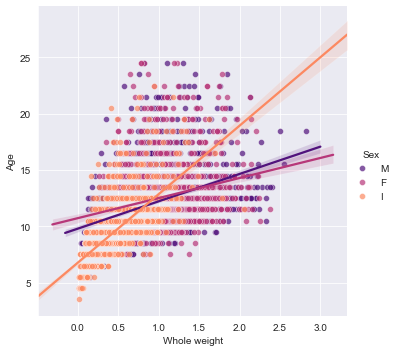

In [192]:
sns.lmplot(x = 'Whole weight', y = 'Age', data = df, hue = 'Sex', palette = 'magma', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [193]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['Age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['Age'] > 25)].index, inplace=True)

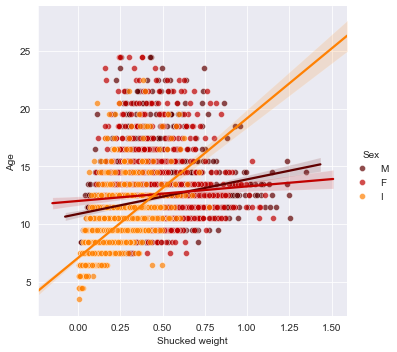

In [194]:
sns.lmplot(x = 'Shucked weight', y = 'Age', data = df, hue = 'Sex', palette = 'gist_heat', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [195]:
df.drop(df[(df['Shucked weight']>= 1) & (df['Age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['Age'] > 20)].index, inplace=True)

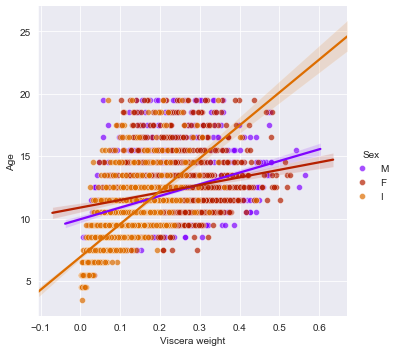

In [196]:
sns.lmplot(x = 'Viscera weight', y = 'Age', data = df, hue = 'Sex', palette = 'gnuplot', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [197]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['Age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['Age'] > 25)].index, inplace=True)

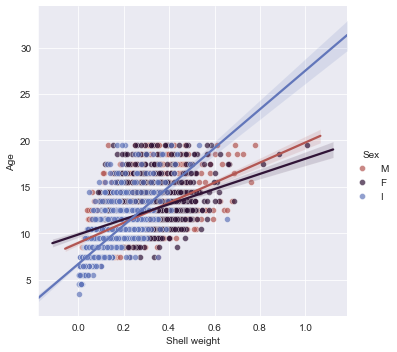

In [198]:
sns.lmplot(x = 'Shell weight', y = 'Age', data = df, hue = 'Sex', palette = 'twilight_r', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [199]:
df.drop(df[(df['Shell weight']> 0.6) & (df['Age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['Age'] > 25)].index, inplace=True)

### Feature Engineering

Here we are dropping the Categorical column "SEX"

In [200]:
df.drop('Sex', axis = 1, inplace = True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [201]:
df['Age'].value_counts()

10.5    686
11.5    622
9.5     567
12.5    469
8.5     391
7.5     259
13.5    247
14.5    197
15.5    118
6.5     115
16.5    102
17.5     61
5.5      57
18.5     51
19.5     38
4.5      14
3.5       1
Name: Age, dtype: int64

In [202]:
df['Age'].mean()

11.127284105131414

In [237]:
df1 = df.copy()

In [238]:
age = []
for i in df1['Age']:
    if i > 11.12:
        age.append('1')
    else:
        age.append('0')
df1['age'] = age
df1.drop('Age', axis = 1, inplace = True)
df1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [240]:
df1['age'].value_counts()

0    2090
1    1905
Name: age, dtype: int64

In [241]:
X = df1.drop('age', axis = 1).values
y = df1['age'].values

Train - Test Split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [243]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the Model

LOGISTIC REGRESSION

In [244]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       611
           1       0.78      0.72      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[494 117]
 [167 421]]
Training Score:  0.7832618025751072
Testing Score:  0.7631359466221852


Support Vector Classifier

In [245]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       611
           1       0.77      0.78      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[477 134]
 [130 458]]
Training Score:  0.8029327610872675
Testing Score:  0.7798165137614679
